# Capstone Jupyter Notebook 3 - Modeling YouTube Videos (Views)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Download dataset of unique songs with YouTube videos

In [2]:
songs = pd.read_csv('./Youtube_Unique.csv', index_col='ID')
songs.head()

,Track,Track_id,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,...,Stream,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video
ID,,,,,,,,,,,,,,,,,,,,,
0,Feel Good Inc.,0d28khcov6AiegSCpG5TuT,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6,-6.679,0.1770,...,1.040235e+09,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True
1,Rhinestone Eyes,1foMv2HQwfQ2vntFf9HFeG,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8,-5.815,0.0302,...,3.100837e+08,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True
2,New Gold (feat. Tame Impala and Bootie Brown),64dLd6rVqDLtkXFYrEUHIU,New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1,-3.930,0.0522,...,6.306347e+07,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True
3,On Melancholy Hill,0q6LuUqGLUiCPP1cbdwFs3,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2,-5.810,0.0260,...,4.346636e+08,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True
4,Clint Eastwood,7yMiX7n9SBvadzox8T5jzT,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10,-8.627,0.1710,...,6.172597e+08,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True


In [3]:
songs.columns

Index(['Track', 'Track_id', 'Album', 'Album_type', 'Uri', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
       'Stream', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video'],
      dtype='object')

### Investigate values in columns

In [4]:
songs.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream,Views,Likes,Comments
count,18488.000000,18488.000000,18488.000000,18488.000000,18488.000000,18488.000000,18488.000000,18488.000000,18488.000000,18488.000000,1.848800e+04,1.795800e+04,1.848800e+04,1.841900e+04,1.839200e+04
mean,0.617855,0.634142,5.302845,-7.701070,0.094906,0.288050,0.056716,0.191267,0.529414,120.764481,2.225484e+05,1.324675e+08,8.907158e+07,6.229390e+05,2.650750e+04
std,0.164749,0.215379,3.575696,4.600717,0.110857,0.287963,0.193465,0.164584,0.247009,29.643351,9.098872e+04,2.380133e+08,2.607107e+08,1.680476e+06,1.920584e+05
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,6.574000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.515000,0.503000,2.000000,-8.928250,0.035300,0.040900,0.000000,0.094000,0.338000,97.001500,1.807482e+05,1.721517e+07,1.754276e+06,2.068200e+04,4.927500e+02
50%,0.635000,0.665000,5.000000,-6.588500,0.049700,0.185000,0.000003,0.124000,0.535000,119.974000,2.133720e+05,4.875589e+07,1.368734e+07,1.169820e+05,3.122000e+03
75%,0.739000,0.799000,8.000000,-4.966750,0.101000,0.475000,0.000556,0.236000,0.728000,139.978250,2.521398e+05,1.351970e+08,6.658414e+07,4.846825e+05,1.361950e+04
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,3.386520e+09,8.079647e+09,5.078863e+07,1.608314e+07


### Attempt to find correlations between variables

In [5]:
songs.corr()

C:\Users\Andrew Vieira\AppData\Local\Temp\ipykernel_8076\2131039685.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  songs.corr()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream,Views,Likes,Comments,Licensed,official_video
Danceability,1.000000,0.223700,0.031078,0.337327,0.214466,-0.265550,-0.304982,-0.080166,0.463904,-0.072803,-0.118758,0.063015,0.082085,0.095193,0.042327,0.004013,0.032758
Energy,0.223700,1.000000,0.030459,0.743043,0.071116,-0.662756,-0.295939,0.170035,0.383305,0.160373,0.022814,0.040350,0.065418,0.061912,0.043649,0.093380,0.119544
Key,0.031078,0.030459,1.000000,0.022628,0.017120,-0.026930,0.005950,-0.005978,0.037179,-0.002554,-0.005216,-0.007700,0.005289,0.005711,0.006109,-0.003459,0.005208
Loudness,0.337327,0.743043,0.022628,1.000000,0.039879,-0.548208,-0.530610,0.085407,0.301118,0.144590,0.005629,0.113757,0.117288,0.123888,0.058734,0.110178,0.152514
Speechiness,0.214466,0.071116,0.017120,0.039879,1.000000,-0.079577,-0.107661,0.087532,0.056417,0.033274,-0.073059,-0.018675,-0.016167,0.008075,0.009345,-0.058708,-0.052458
Acousticness,-0.265550,-0.662756,-0.026930,-0.548208,-0.079577,1.000000,0.261938,-0.044969,-0.197669,-0.131901,-0.034771,-0.097409,-0.071174,-0.079984,-0.052558,-0.081980,-0.096074
Instrumentalness,-0.304982,-0.295939,0.005950,-0.530610,-0.107661,0.261938,1.000000,-0.060159,-0.259300,-0.076128,-0.002087,-0.090801,-0.077552,-0.076558,-0.030154,-0.056238,-0.068820
Liveness,-0.080166,0.170035,-0.005978,0.085407,0.087532,-0.044969,-0.060159,1.000000,0.036114,0.008513,0.009419,-0.039766,-0.014184,-0.021282,-0.011765,0.002828,0.008034
Valence,0.463904,0.383305,0.037179,0.301118,0.056417,-0.197669,-0.259300,0.036114,1.000000,0.091976,-0.069125,-0.016390,0.031855,0.007093,0.014292,0.012450,0.004357
Tempo,-0.072803,0.160373,-0.002554,0.144590,0.033274,-0.131901,-0.076128,0.008513,0.091976,1.000000,-0.011978,0.005529,0.002137,0.007105,0.008841,0.011127,0.023459


In [6]:
songs.corr().Views.sort_values()

C:\Users\Andrew Vieira\AppData\Local\Temp\ipykernel_8076\66834864.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  songs.corr().Views.sort_values()


Instrumentalness   -0.077552
Acousticness       -0.071174
Speechiness        -0.016167
Liveness           -0.014184
Tempo               0.002137
Key                 0.005289
Valence             0.031855
Duration_ms         0.035120
Energy              0.065418
Danceability        0.082085
Loudness            0.117288
official_video      0.141125
Licensed            0.153584
Comments            0.406982
Stream              0.602207
Likes               0.885496
Views               1.000000
Name: Views, dtype: float64

### Unfortunately, none of the metric variables are strongly correlated to the number of views.

### Create a list of all the metric (input variable) columns

In [7]:
feature_columns = list(songs.describe().columns)
feature_columns = feature_columns[0:11]
print(feature_columns)

['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']


### This function takes a DataFrame, a list of input columns, and a regression type as inputs, creates a model to predict the number of streams a song has, and returns the RMSE of the model.

In [8]:
def get_rmse(df, cols, reg):
    X = df[cols]
    y = df.Views
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    reg.fit(X_train, y_train)
    
    preds = reg.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, preds))

In [9]:
# Three regression types in the scikit-learn library
lin_reg = LinearRegression()
rand_for_reg = RandomForestRegressor()
kn_reg = KNeighborsRegressor()

### Use the average number of views in the test data as a baseline

In [10]:
X = songs[feature_columns]
y = songs.Views

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

y_test_mean = y_test.mean()
print('Average number of views in test data =', round(y_test_mean))

Average number of views in test data = 87437106


### For a model to be good, its RMSE must be less than the baseline RMSE.

In [11]:
baseline_series = [y_test_mean] * len(y_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_series))
best_rmse = baseline_rmse
print('Baseline RMSE =', round(best_rmse))

Baseline RMSE = 228587416


In [12]:
# This function returns and prints the smaller RMSE.
# This will be used a lot!
def new_best_rmse(rmse_new, rmse_old):
    print('RMSE for this model =', round(rmse_new))
    if rmse_new < rmse_old:
        print('This is now the best RMSE.')
        return rmse_new
    print('The best RMSE is still', round(rmse_old))
    return rmse_old

### Now create a linear regression model with all input variables and calculate the RMSE

In [13]:
rmse = get_rmse(songs, feature_columns, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 226122090
This is now the best RMSE.


In [14]:
100 * (1 - best_rmse/baseline_rmse)

1.0785048255277374

### The RMSE of the linear regression model is 1.08% better than the baseline.
### Let's try a random forest regression model with the same inputs.

In [15]:
rmse = get_rmse(songs, feature_columns, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 236809498
The best RMSE is still 226122090


### A random forest regression is not better than the linear regression.
### What about k-neighbors regression?

In [16]:
rmse = get_rmse(songs, feature_columns, kn_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 261820264
The best RMSE is still 226122090


### With 50 neighbors?

In [17]:
kn_reg = KNeighborsRegressor(n_neighbors=50)
rmse = get_rmse(songs, feature_columns, kn_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 229862321
The best RMSE is still 226122090


### The linear regression model is still the best so far.

### Now apply feature engineering to the `Key` column by changing it from numerical to categorical

In [18]:
songs.Key.value_counts()

0     2062
7     1997
1     1941
2     1828
9     1781
5     1552
11    1493
4     1360
8     1329
6     1280
10    1272
3      593
Name: Key, dtype: int64

In [19]:
key_dummies = pd.get_dummies(songs.Key, prefix='Key', drop_first=True)
songs2 = pd.concat([songs, key_dummies], axis=1)
songs2.drop('Key', axis=1, inplace=True)
songs2.columns

Index(['Track', 'Track_id', 'Album', 'Album_type', 'Uri', 'Danceability',
       'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Stream', 'Url_youtube',
       'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Description',
       'Licensed', 'official_video', 'Key_1', 'Key_2', 'Key_3', 'Key_4',
       'Key_5', 'Key_6', 'Key_7', 'Key_8', 'Key_9', 'Key_10', 'Key_11'],
      dtype='object')

### The new dataframe contains dummy columns for each value of `Key` except 0, because it was the most common value.
### Create a list of feature columns with the new dummy variables

In [20]:
feature_columns_2 = list(songs2.describe().columns)[0:10]
feature_columns_2.extend(list(songs2.describe().columns)[-11:])
print(feature_columns_2)

['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Key_1', 'Key_2', 'Key_3', 'Key_4', 'Key_5', 'Key_6', 'Key_7', 'Key_8', 'Key_9', 'Key_10', 'Key_11']


In [21]:
rmse = get_rmse(songs2, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 226189017
The best RMSE is still 226122090


### This RMSE is actually higher than the best RSME (but not by much).
### Would random forest regression be better?

In [22]:
rmse = get_rmse(songs2, feature_columns_2, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 237521370
The best RMSE is still 226122090


### K neighbors regression?

In [23]:
kn_reg = KNeighborsRegressor(n_neighbors=50)
rmse = get_rmse(songs2, feature_columns_2, kn_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 229856197
The best RMSE is still 226122090


### Now try removing outliers

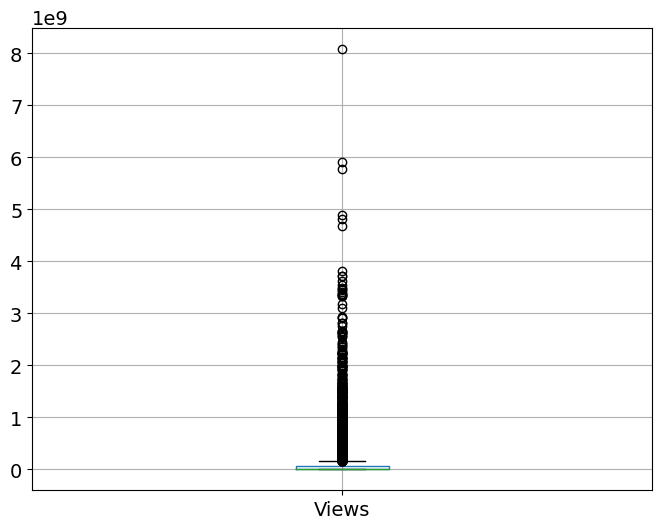

In [24]:
songs2.boxplot(column='Views');

In [25]:
songs2[songs2.Views > 4e9]

,Track,Track_id,Album,Album_type,Uri,Danceability,Energy,Loudness,Speechiness,Acousticness,...,Key_2,Key_3,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11
ID,,,,,,,,,,,,,,,,,,,,,
365,Despacito,6habFhsOp2NvshLv26DqMb,VIDA,album,spotify:track:6habFhsOp2NvshLv26DqMb,0.655,0.797,-4.787,0.1530,0.19800,...,1,0,0,0,0,0,0,0,0,0
8937,Gangnam Style (강남스타일),03UrZgTINDqvnUMbbIMhql,Gangnam Style (강남스타일),single,spotify:track:03UrZgTINDqvnUMbbIMhql,0.727,0.937,-2.871,0.2860,0.00417,...,0,0,0,0,0,0,0,0,0,1
10686,Uptown Funk (feat. Bruno Mars),32OlwWuMpZ6b0aN2RZOeMS,Uptown Special,album,spotify:track:32OlwWuMpZ6b0aN2RZOeMS,0.856,0.609,-7.223,0.0824,0.00801,...,0,0,0,0,0,0,0,0,0,0
12452,Shape of You,7qiZfU4dY1lWllzX7mPBI3,÷ (Deluxe),album,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,-3.183,0.0802,0.58100,...,0,0,0,0,0,0,0,0,0,0
12469,See You Again (feat. Charlie Puth),2JzZzZUQj3Qff7wapcbKjc,See You Again (feat. Charlie Puth),single,spotify:track:2JzZzZUQj3Qff7wapcbKjc,0.689,0.481,-7.503,0.0815,0.36900,...,0,0,0,0,0,0,0,0,1,0
20303,Wheels on the Bus,6YQ7aPJhk0MGpwoKfFAEbS,"CoComelon Kids Hits, Vol. 1",album,spotify:track:6YQ7aPJhk0MGpwoKfFAEbS,0.941,0.387,-11.920,0.0427,0.18400,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Remove the six songs with ridiculously high streams
songs3 = songs2[songs2.Views <= 4e9]

In [27]:
rmse = get_rmse(songs3, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 226753135
The best RMSE is still 226122090


In [28]:
# Remove just the three highest songs
songs3 = songs2[songs2.Views <= 5e9]

In [29]:
rmse = get_rmse(songs3, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 229966752
The best RMSE is still 226122090


In [30]:
# Remove just the highest song
songs3 = songs2[songs2.Views <= 6e9]

In [31]:
rmse = get_rmse(songs3, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 237971368
The best RMSE is still 226122090


### Removing the highest-viewed videos did not improve the model. Let's try other possible outliers.

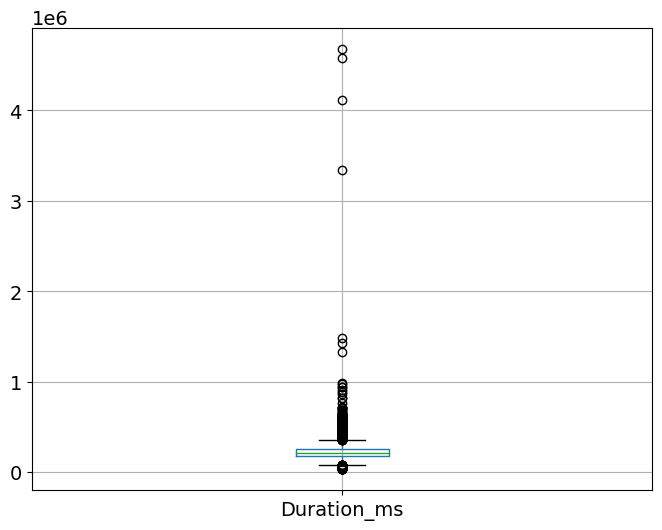

In [32]:
songs2.boxplot(column='Duration_ms');

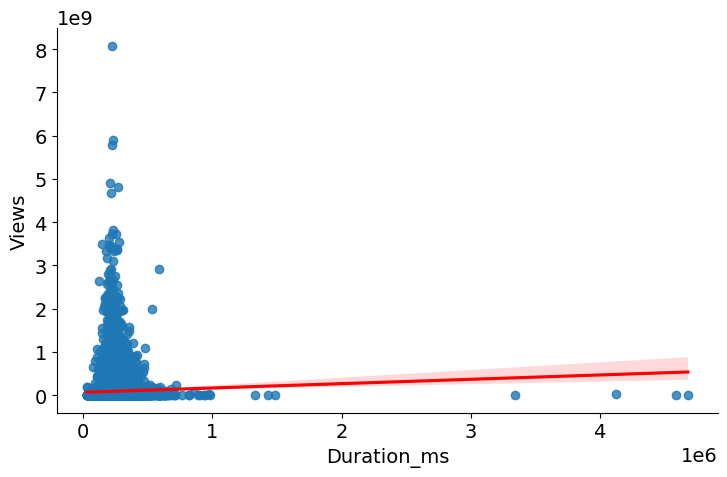

In [33]:
sns.lmplot(data=songs2, x='Duration_ms', y='Views', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [34]:
songs2[songs2.Duration_ms > 1e6]

,Track,Track_id,Album,Album_type,Uri,Danceability,Energy,Loudness,Speechiness,Acousticness,...,Key_2,Key_3,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11
ID,,,,,,,,,,,,,,,,,,,,,
2943,52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...,1FSYDJAlyHAabWhiGgYfDq,52 Non Stop Dilbar Dilbar Remix,compilation,spotify:track:1FSYDJAlyHAabWhiGgYfDq,0.5210,0.837,-4.501,0.0794,0.0593,...,0,0,0,0,0,1,0,0,0,0
4449,Om Bhurbhuwasah,3oj9ZcytkTaovswquxjzo1,Gayatri Mantra,single,spotify:track:3oj9ZcytkTaovswquxjzo1,0.7190,0.466,-9.153,0.0417,0.7330,...,0,1,0,0,0,0,0,0,0,0
5246,Hitazos: Amores Como el Nuestro / Que Fue / Al...,2ZixSR7OKIpdPUk4dwOekn,Hitazos: Amores Como el Nuestro / Que Fue / Al...,compilation,spotify:track:2ZixSR7OKIpdPUk4dwOekn,0.5190,0.790,-4.342,0.0503,0.2300,...,0,0,0,0,0,1,0,0,0,0
5385,Ragga Moofin Mix,6ZbWeRhL76RXghqoMNF932,"Playero 37 ""Underground""",album,spotify:track:6ZbWeRhL76RXghqoMNF932,0.7970,0.670,-14.259,0.1770,0.0354,...,0,0,0,0,1,0,0,0,0,0
5387,Non Stop Reegae,5EVCuT4L4hsyDtA7H1yByW,"Playero 38 ""Underground""",album,spotify:track:5EVCuT4L4hsyDtA7H1yByW,0.8570,0.673,-11.922,0.0949,0.0258,...,0,0,0,0,0,0,0,0,0,0
9361,Ocean Waves for Sleep,1saXdvEAafdRzUphXBzSHg,Ocean Waves,single,spotify:track:1saXdvEAafdRzUphXBzSHg,0.0797,0.995,-17.379,0.0612,0.9320,...,0,0,0,0,0,0,0,0,0,0
10475,High Rated Gabru 52 Non Stop Hits(Remix By Man...,2HyMuSCZJIxgnZBkuPT3TA,High Rated Gabru 52 Non Stop Hits,compilation,spotify:track:2HyMuSCZJIxgnZBkuPT3TA,0.3850,0.935,-2.545,0.2590,0.0843,...,1,0,0,0,0,0,0,0,0,0


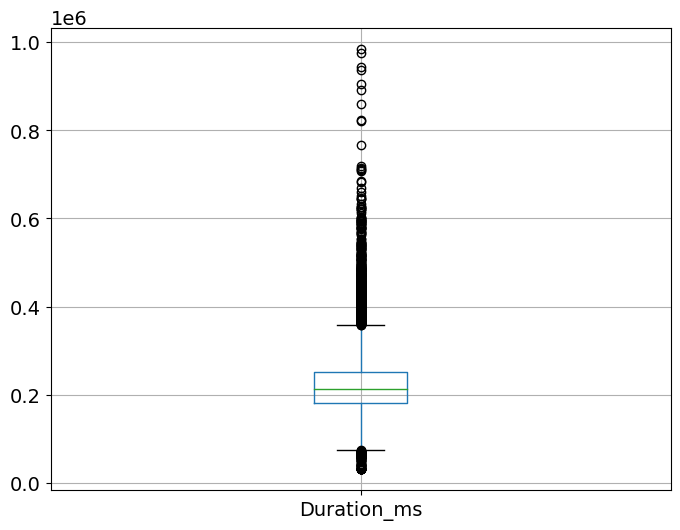

In [35]:
# Remove songs over 1,000,000 ms long
songs3 = songs2[songs2.Duration_ms <= 1e6]
songs3.boxplot(column='Duration_ms');

In [36]:
rmse = get_rmse(songs3, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 248065430
The best RMSE is still 226122090


### No improvement. Revert back to previous dataset (`songs2`).

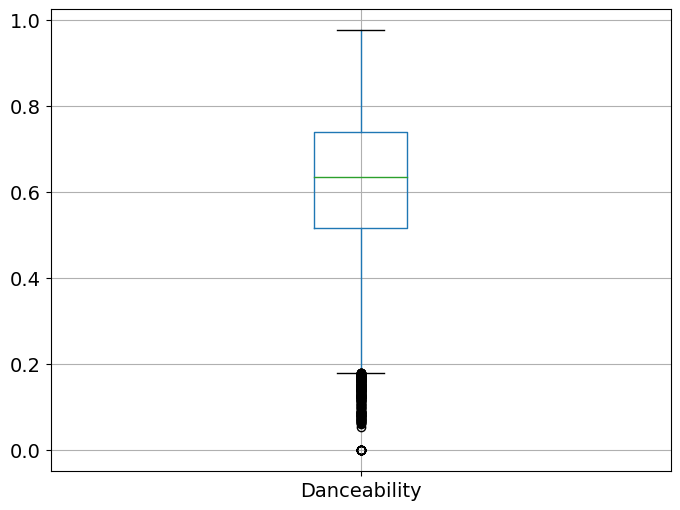

In [37]:
songs2.boxplot(column='Danceability');

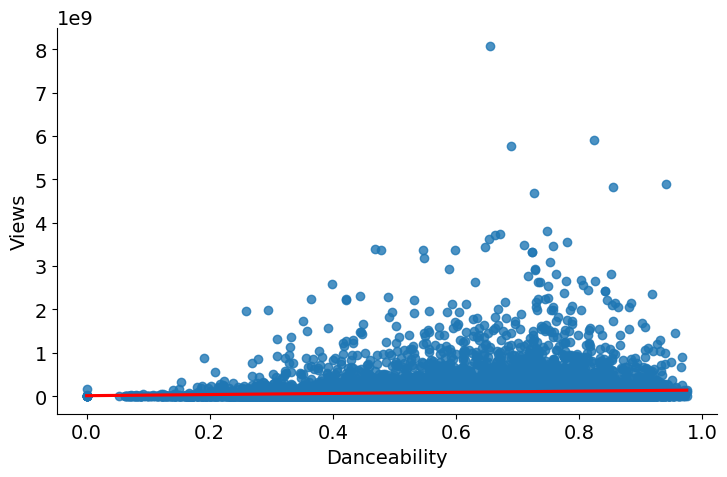

In [38]:
sns.lmplot(data=songs2, x='Danceability', y='Views', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [39]:
songs2[songs2.Danceability == 0.0]

,Track,Track_id,Album,Album_type,Uri,Danceability,Energy,Loudness,Speechiness,Acousticness,...,Key_2,Key_3,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11
ID,,,,,,,,,,,,,,,,,,,,,
2073,"Hello, Dolly!",63kd4m3VFxcJjPVVtbVNAu,"Hello, Dolly! (Remastered)",album,spotify:track:63kd4m3VFxcJjPVVtbVNAu,0.0,0.405000,-9.935,0.0,0.84200,...,0,0,0,0,0,0,0,0,0,0
2871,Arrival,6quMGNh47CpSR5kmZSYSTK,Israeli Salad,album,spotify:track:6quMGNh47CpSR5kmZSYSTK,0.0,0.802000,-7.977,0.0,0.00417,...,0,0,0,0,0,0,0,0,0,0
7187,"Rigoletto / Act 3: ""La donna è mobile"" - Live",4mZlQk9Ha7WwJZUngARQeY,The Three Tenors - The Best of the 3 Tenors,compilation,spotify:track:4mZlQk9Ha7WwJZUngARQeY,0.0,0.402000,-15.718,0.0,0.97200,...,0,0,0,1,0,0,0,0,0,0
8373,Adieux,0aGA1zFV0ER1xLiJmHxb2s,You And The Night,album,spotify:track:0aGA1zFV0ER1xLiJmHxb2s,0.0,0.105000,-13.925,0.0,0.98900,...,0,0,0,0,0,1,0,0,0,0
9266,The Departure,59gg6zQhSKGVnkT3hWAY3l,Voyager - Essential Max Richter,album,spotify:track:59gg6zQhSKGVnkT3hWAY3l,0.0,0.036200,-22.519,0.0,0.99400,...,0,0,0,0,0,0,0,0,0,0
9348,Beach Waves and Soothing Brown Noise,0tIkLggEJ9QriD7KFz1GGA,Soothing Brown Noise Waves and Calming Ambient...,album,spotify:track:0tIkLggEJ9QriD7KFz1GGA,0.0,0.000252,-17.746,0.0,0.00948,...,0,0,0,0,0,0,0,1,0,0
13839,Clean White Noise - Loopable with no fade,2bRKxuH1o7pTmb1y4GfdEc,Best White Noise for Baby Sleep - Loopable wit...,album,spotify:track:2bRKxuH1o7pTmb1y4GfdEc,0.0,0.003420,-28.460,0.0,0.79100,...,0,0,0,0,0,0,1,0,0,0
13840,Pure Brown Noise - Loopable with no fade,5I21rMWLtCjWQl6QyLn85W,Best White Noise for Baby Sleep - Loopable wit...,album,spotify:track:5I21rMWLtCjWQl6QyLn85W,0.0,0.001250,-27.592,0.0,0.90800,...,0,0,0,0,0,0,0,0,0,0
13842,Air Conditioner - Loopable with no fade,4f9s3wr1e1QdpMDxQosSTz,Best White Noise for Baby Sleep - Loopable wit...,album,spotify:track:4f9s3wr1e1QdpMDxQosSTz,0.0,0.000055,-21.995,0.0,0.92100,...,0,0,0,0,0,0,0,0,1,0


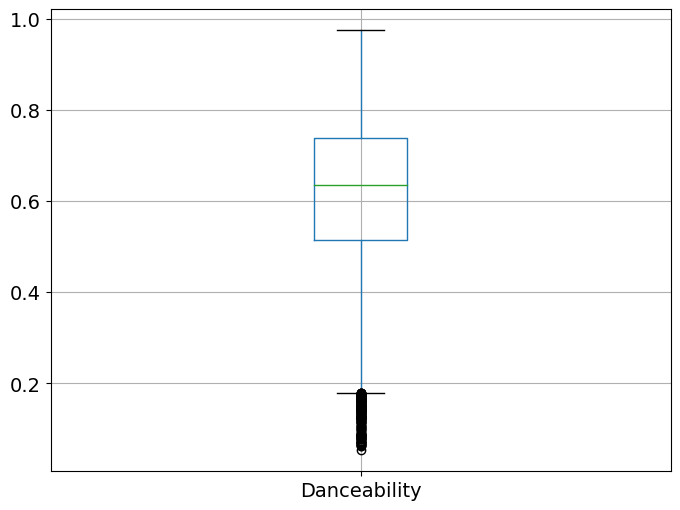

In [40]:
# Remove songs with danceability of 0.0
songs3 = songs2[songs2.Danceability > 0.0]
songs3.boxplot(column='Danceability');

In [41]:
rmse = get_rmse(songs3, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 244775552
The best RMSE is still 226122090


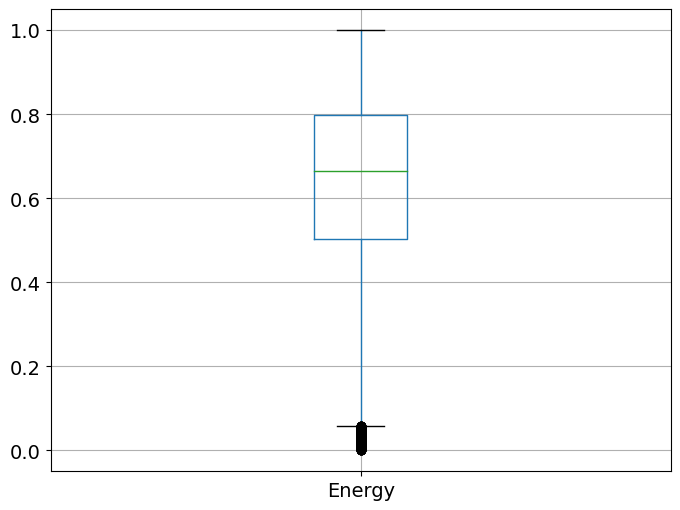

In [42]:
# No improvement. Still using songs2
songs2.boxplot(column='Energy');

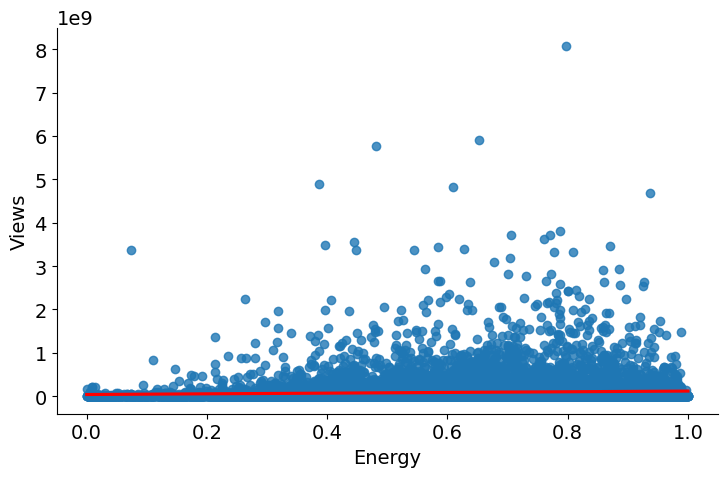

In [43]:
sns.lmplot(data=songs2, x='Energy', y='Views', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

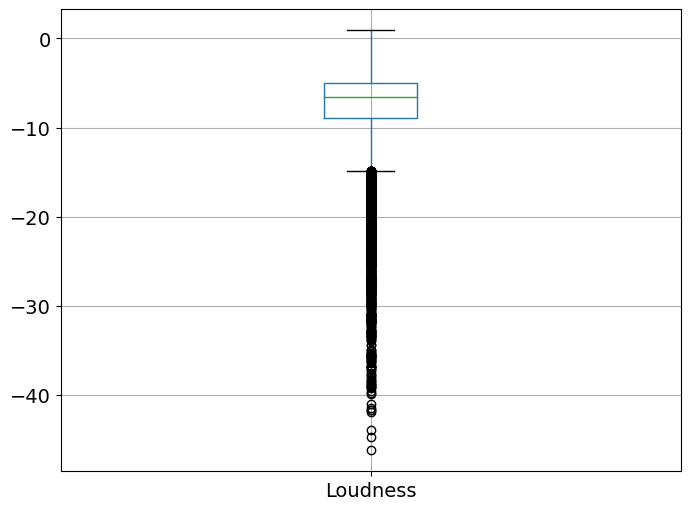

In [44]:
songs2.boxplot(column='Loudness');

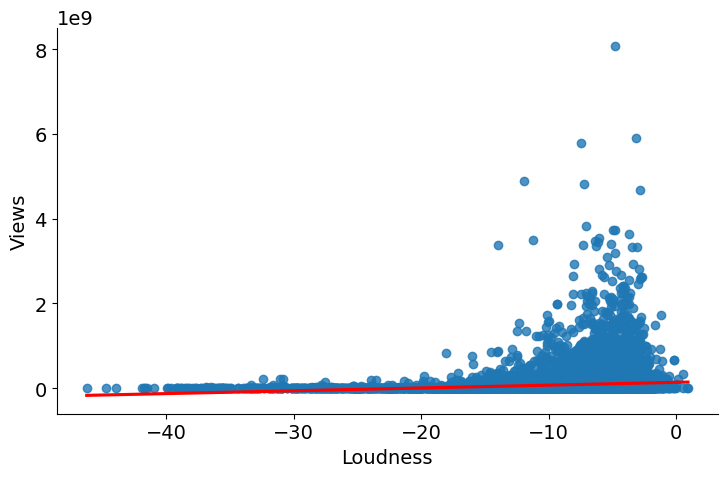

In [45]:
sns.lmplot(data=songs2, x='Loudness', y='Views', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

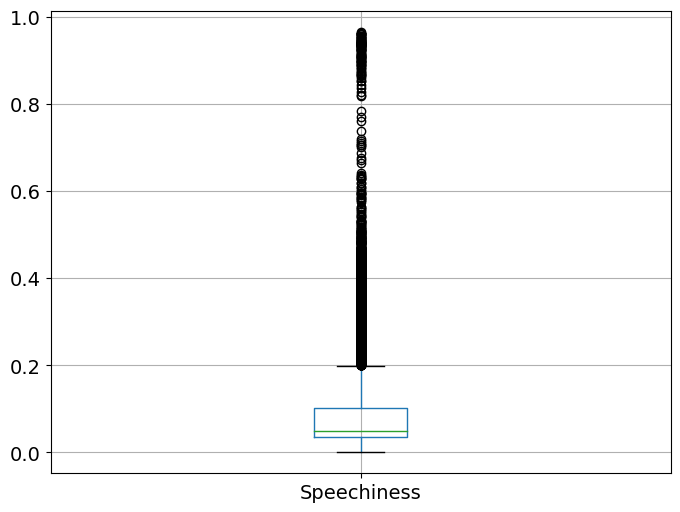

In [46]:
songs2.boxplot(column='Speechiness');

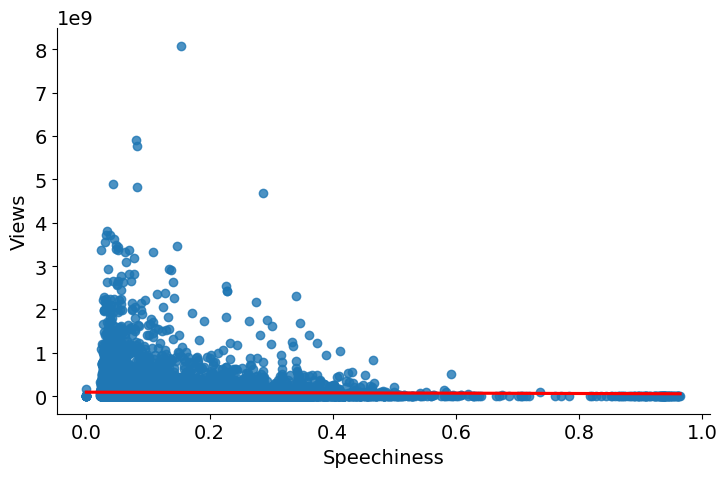

In [47]:
sns.lmplot(data=songs2, x='Speechiness', y='Views', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

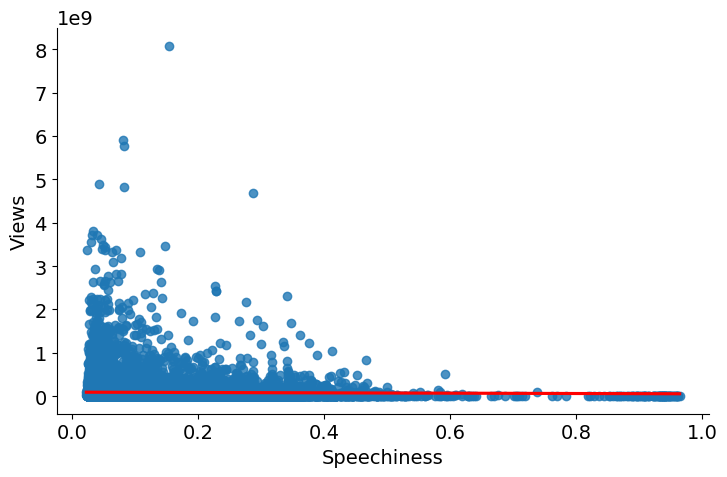

In [48]:
songs3 = songs2[songs2.Speechiness > 0.0]
sns.lmplot(data=songs3, x='Speechiness', y='Views', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [49]:
rmse = get_rmse(songs3, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 244775552
The best RMSE is still 226122090


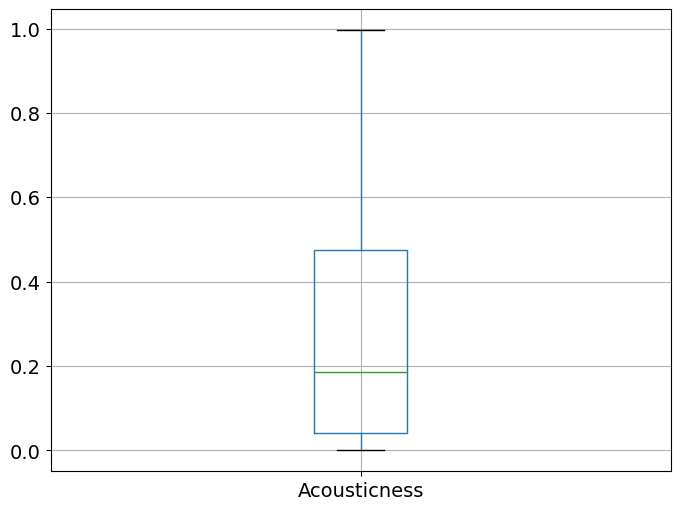

In [50]:
# No improvement. Still using songs2
songs2.boxplot(column='Acousticness');

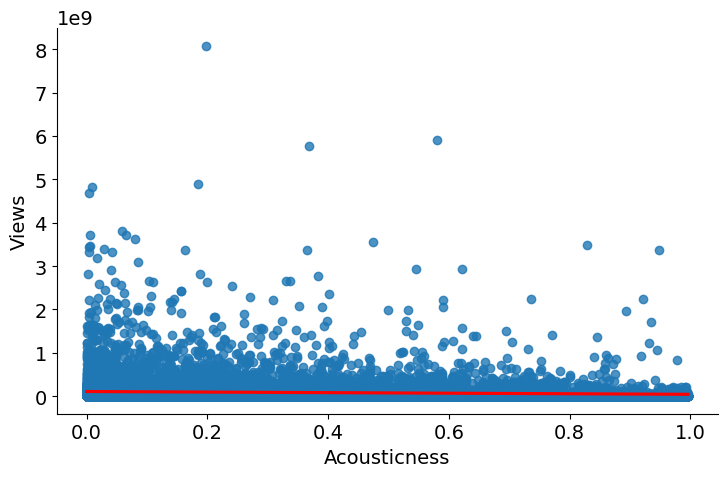

In [51]:
sns.lmplot(data=songs2, x='Acousticness', y='Views', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

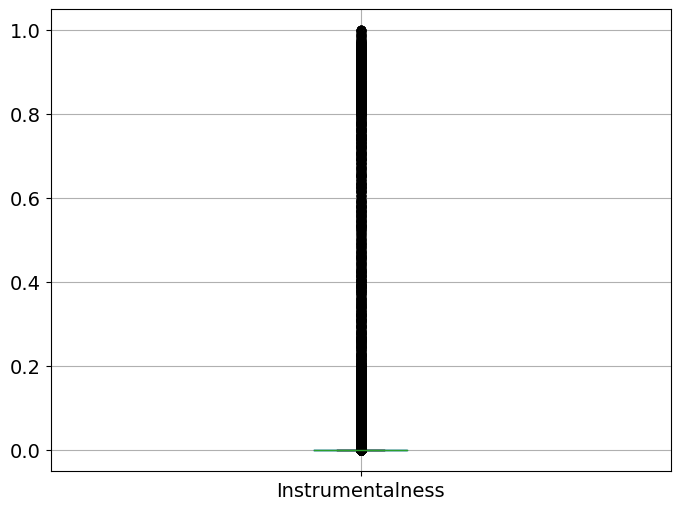

In [52]:
songs2.boxplot(column='Instrumentalness');

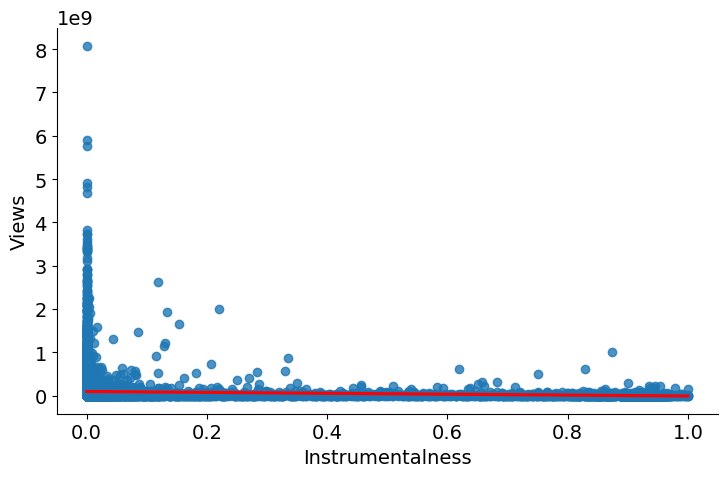

In [53]:
sns.lmplot(data=songs2, x='Instrumentalness', y='Views', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

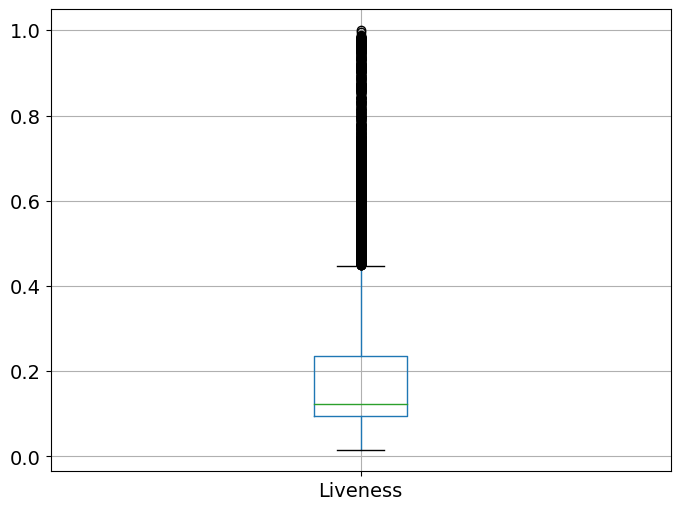

In [54]:
songs2.boxplot(column='Liveness');

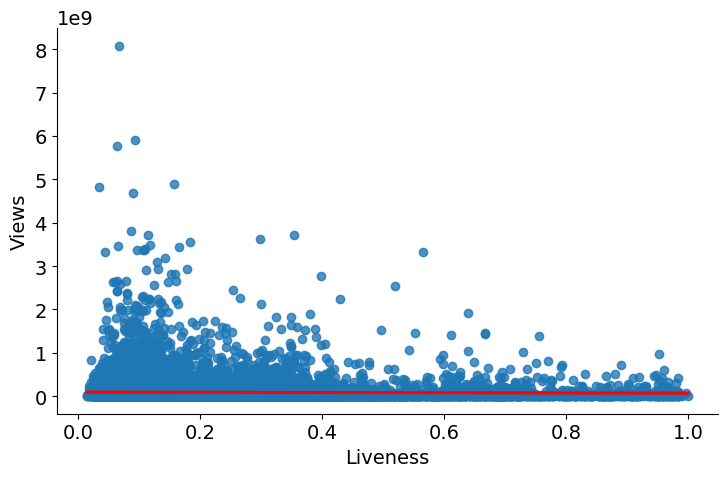

In [55]:
sns.lmplot(data=songs2, x='Liveness', y='Views', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

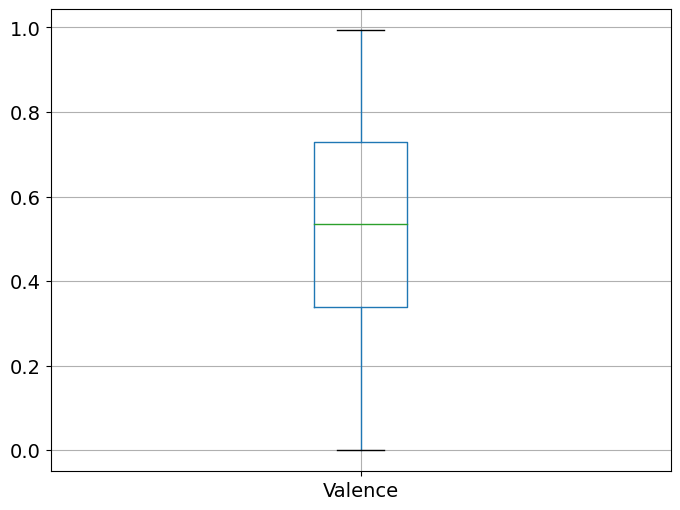

In [56]:
songs2.boxplot(column='Valence');

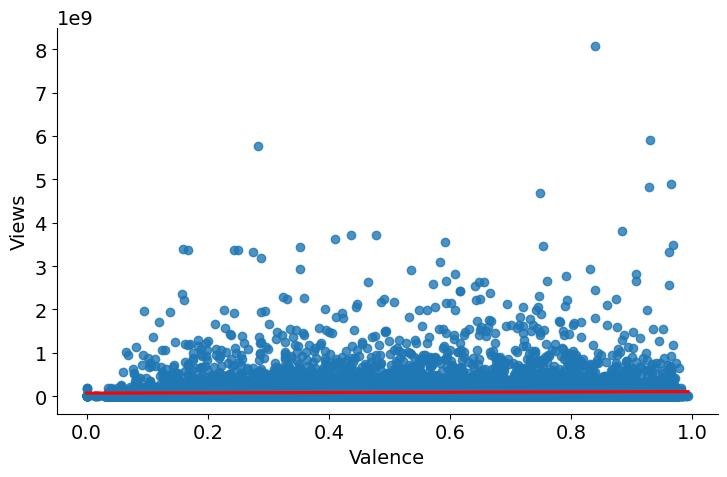

In [57]:
sns.lmplot(data=songs2, x='Valence', y='Views', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

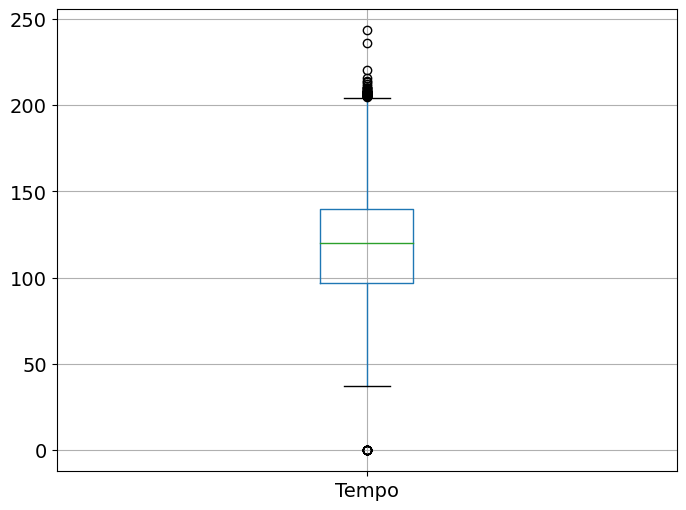

In [58]:
songs2.boxplot(column='Tempo');

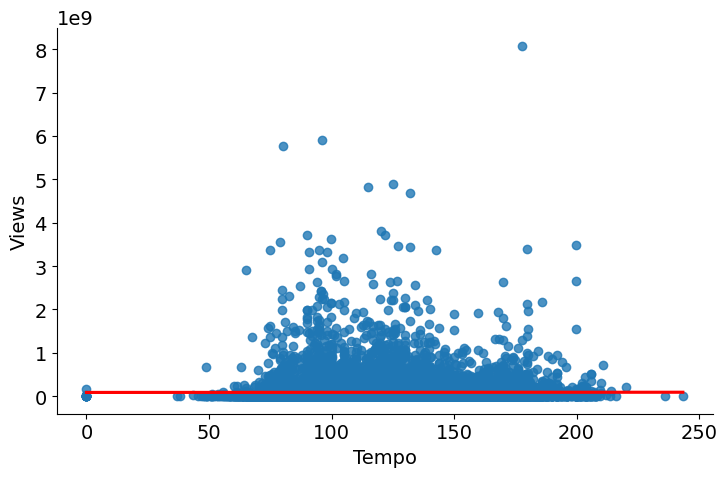

In [59]:
sns.lmplot(data=songs2, x='Tempo', y='Views', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

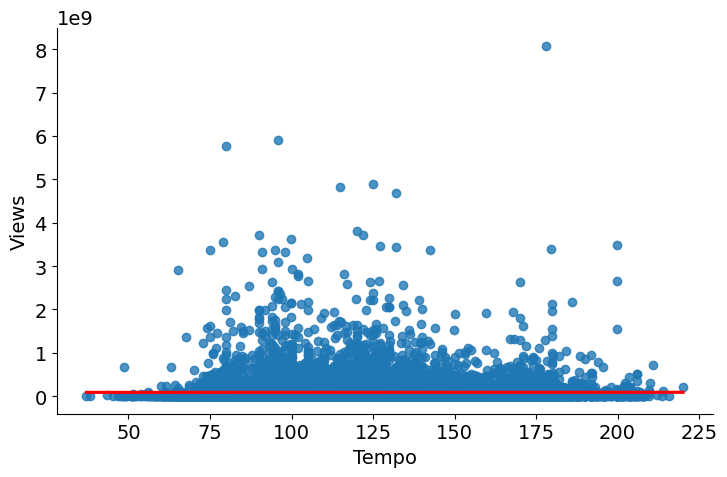

In [60]:
songs3 = songs2[(songs2.Tempo > 0) & (songs2.Tempo < 230)]
sns.lmplot(data=songs3, x='Tempo', y='Views', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [61]:
rmse = get_rmse(songs3, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 252077909
The best RMSE is still 226122090


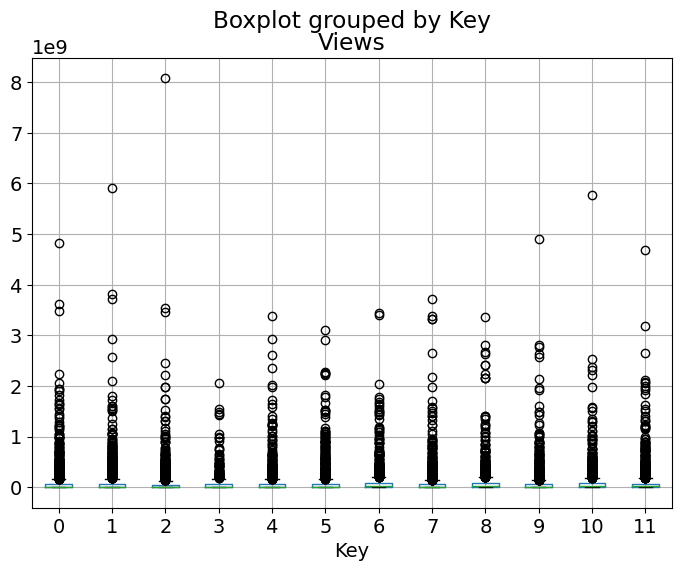

In [62]:
songs.boxplot(column='Views', by='Key');

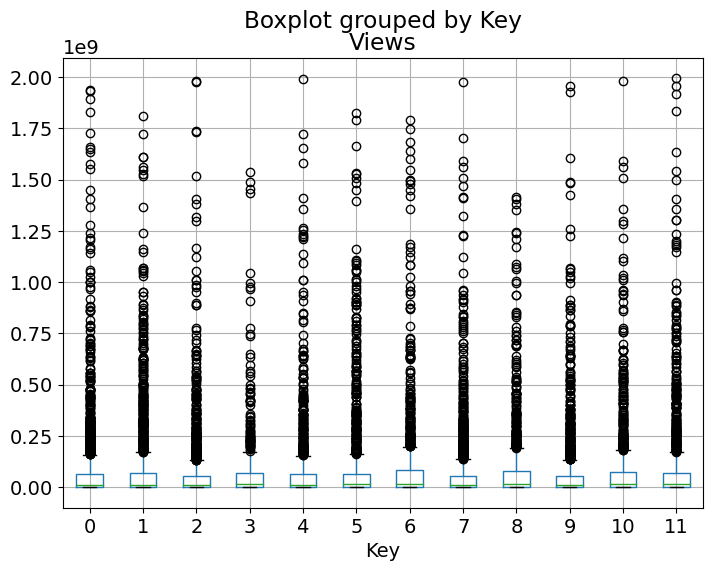

In [63]:
songs[songs.Views <= 2e9].boxplot(column='Views', by='Key');

In [64]:
songs3 = songs2[songs2.Views <= 2e9]

In [65]:
rmse = get_rmse(songs3, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 186932927
This is now the best RMSE.


### Restricting the dataset to views under 2 billion improved the RMSE.

In [66]:
songs4 = songs3[songs3.Duration_ms <= 1e6]
rmse = get_rmse(songs4, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 183040093
This is now the best RMSE.


### This time, removing songs longer than 1 million ms improved the RMSE.

In [67]:
songs5 = songs4[(songs4.Tempo > 0) & (songs4.Tempo < 230)]
rmse = get_rmse(songs5, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 181166508
This is now the best RMSE.


### Another improvement: removing songs with a `Tempo` of 0 or greater than 230

In [68]:
songs.shape[0] - songs5.shape[0], round(100 * (songs.shape[0] - songs5.shape[0]) / songs.shape[0], 2)

(87, 0.47)

### In all, I removed 87 songs, but this is only 0.47% of the original dataset.

### In some of the above scatterplots, the songs with high numbers of streams were concentrated at one end of the x domain. I will create a model with only these columns.

In [69]:
feature_columns_3 = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Duration_ms']

In [70]:
rmse = get_rmse(songs5, feature_columns_3, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 181045436
This is now the best RMSE.


In [71]:
# Being even more selective with the concentration of points
feature_columns_4 = ['Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness']

In [72]:
rmse = get_rmse(songs5, feature_columns_4, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 181760774
The best RMSE is still 181045436


### The best model excludes `Key`, `Valence`, and `Tempo`.
### Now let's try each column individually.

In [73]:
print(feature_columns_2)

['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Key_1', 'Key_2', 'Key_3', 'Key_4', 'Key_5', 'Key_6', 'Key_7', 'Key_8', 'Key_9', 'Key_10', 'Key_11']


In [74]:
for col in feature_columns_2:
    col_rmse = get_rmse(songs5, [col], lin_reg)
    print(f'RMSE for {col}: {round(col_rmse)} {col_rmse < best_rmse}')

RMSE for Danceability: 182870693 False
RMSE for Energy: 182995512 False
RMSE for Loudness: 181953408 False
RMSE for Speechiness: 183502902 False
RMSE for Acousticness: 182769535 False
RMSE for Instrumentalness: 182840047 False
RMSE for Liveness: 183551991 False
RMSE for Valence: 183443564 False
RMSE for Tempo: 183600385 False
RMSE for Duration_ms: 183237660 False
RMSE for Key_1: 183527143 False
RMSE for Key_2: 183489540 False
RMSE for Key_3: 183551171 False
RMSE for Key_4: 183549661 False
RMSE for Key_5: 183594688 False
RMSE for Key_6: 183497445 False
RMSE for Key_7: 183543304 False
RMSE for Key_8: 183549387 False
RMSE for Key_9: 183594209 False
RMSE for Key_10: 183555996 False
RMSE for Key_11: 183499083 False


### No column by itself is as good at predicting views as combination of `Danceability`, `Energy`, `Loudness`, `Speechiness`, `Acousticness`, `Instrumentalness`, `Liveness`, and `Duration_ms`.

In [75]:
100 * (baseline_rmse - best_rmse) / baseline_rmse

20.798161570415235

### The best model is 20.79% better than always guessing the average number of streams.

### So what exactly is the best regression formula?

In [76]:
X = songs5[feature_columns_3]
y = songs5.Views
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lin_reg.fit(X_train, y_train)
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_

In [77]:
model = str(intercept)

for i in range(len(feature_columns_3)):
    model += f'\n + {coefficients[i]} * {feature_columns_3[i]}'

print(model)

85289683.8900356
 + 62620690.34451659 * Danceability
 + -52870681.05228142 * Energy
 + 6014041.875816899 * Loudness
 + -47042349.01783537 * Speechiness
 + -15025558.39362635 * Acousticness
 + -11792245.782436578 * Instrumentalness
 + 3002845.4476624546 * Liveness
 + 200.4562640717829 * Duration_ms
